# Lab Tutorial 03
### Learning Outcomes 
In this tutorial we will learn 
- how to define a function
- initialize a numpy array
- use while or for loops to iteratively update that numpy array
- randomly sample from data with and without replacements
- how to get the qth percentile of the data

# Importing packages

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt  # Correct import
%matplotlib inline

# Defining a function

## A simple function: without input and output

In [4]:
 # no input and output. Just printing
def myFunction():
    print("This is my function")

In [5]:
myFunction()

This is my function


## Function with input

In [7]:
# a simple function with a string as input
def print_name(name):
    print("my name is %s" % name)

In [8]:
print_name("Jason")

my name is Jason


## Function with input and output
- simple function 
- using while and for loops within functions

In [9]:
 # a function that takes two inputs and return their sum in the output
    # takes in two values and returns their sum in the output
    # inputs: a - first number
    #         b - second number
    # outputs: s - sum of a and b

def add_vals(number1, number2):
    s = number1 + number2
    return s

In [10]:
add_vals(100, 45)

145

In [16]:
# how to set default values for function inputs?
# How will the function operate with and without set default values
## with default values

    # Calculates n!
    # Input: n - the number for which we want to calculate the factorial
    # Output: f - n!
    
def factorial(n = 1):
    f = 1
    i = 1
    while i<=n:
        f = f * i
        i = i + 1
    
    return f

## without default values

    # Calculates n!
    # Input: n - the number for which we want to calculate the factorial
    # Output: f - n!
    


In [17]:
factorial(3)

6

# Random sampling from data

## generate random data 

(array([  9.,  25.,  85., 145., 242., 220., 169.,  68.,  29.,   8.]),
 array([-3.08533193, -2.4673943 , -1.84945667, -1.23151903, -0.6135814 ,
         0.00435623,  0.62229386,  1.24023149,  1.85816912,  2.47610675,
         3.09404438]),
 <BarContainer object of 10 artists>)

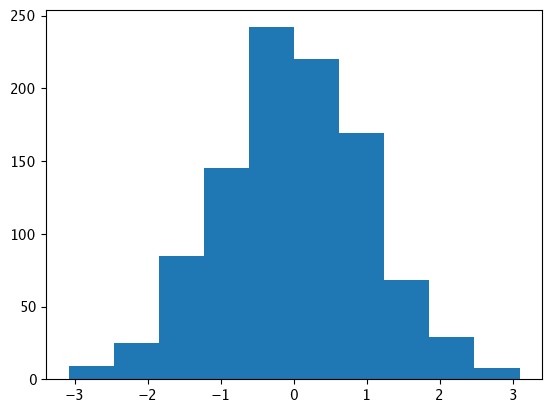

In [56]:
 # 1000 samples (numbers) drawn from normal distribution
d = np.random.normal(size = 1000)
plt.hist(d)

## random sampling from data
- with replacement
- without replacement

Question to class: Why do we sample with replacement in the bootstrap? 

### random sampling from the generated data

In [22]:
sample = np.random.choice(d, size = 30, replace = True)
sample

array([-0.61162831,  0.06224417, -0.11159078, -0.31786357,  0.94966539,
       -0.56823691, -0.10707402, -0.45155947, -0.2276391 , -0.72855696,
        1.27853147,  0.03151184,  0.96529034,  0.68535211,  0.15853517,
        0.6326603 ,  1.51365756, -1.02404627, -0.13632101,  0.20817527,
        0.90517055,  0.7766391 ,  0.24066028, -0.33570979, -0.15895299,
       -0.17260521, -0.3312947 , -1.66784581,  2.3223255 ,  0.68883591])

### random sampling (random numbers) from a range of numbers (from the lecture notes)

In [30]:
sample2 = np.random.choice(range(146), size = 30, replace = False)
sample2

array([ 86,  57,  92,  50,  18, 101,  83,  44,   6,  24, 124,  38, 143,
        33,  68, 117,  85,  56,  84,  67,  60, 142, 123, 110,  53,  65,
        42, 130, 133,   8])

## A function to simulate random numbers N times

In [35]:
# using print statements to check the output of each line
def N_random_sample(data, N = 1000, sample_size = 25):
    Nsample = np.zeros((N, sample_size))

    iter = 1

    while iter < N:
        Nsample[iter, :] = np.random.choice(data, size = sample_size, replace = True)
        iter = iter + 1
    
    return Nsample

In [36]:
# again generate data
# 1000 samples (numbers) drawn from normal distribution
samples = N_random_sample(data = d, N = 10)
print(samples)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.52279639  2.07129058  1.54381406 -0.49795686  0.74734941  0.94072782
  -0.22110994  0.36508431  0.03611432  0.84172119  1.37729395 -0.70009667
   0.79786478 -0.54429121  0.31205619 -0.23921756  0.36484525 -0.42701114
  -0.19427339 -1.09145492  0.7766391  -2.58192459 -0.71205276 -0.56823691
   0.34348867]
 [-1.67005072 -0.49795686  1.87502887 -0.2276391   0.46697283 -0.54429121
   0.34985531  0.56681673 -0.94612834  0.3746259  -0.30582969  0.50791189
   0.67364523 -0.98524452 -1.01124209 -0.12530988  0.99935972  0.79237625
   0.33335059  1.20545764  1.11287017 -0.48368608  0.27150314 -1.27973433
  -0.01226274]
 [ 0.17009326  0.09903325 -1.65238796 -1.50857806  0.20879827  1.17212239
   1.30035089 -0.49936834

In [ ]:

# print(samples)


## A function to be applied to numbers as input

In [39]:

# taked array a and apply function fcn to array a
# Inputs:  a      - the array of numbers
#          fcn    - function to be applied to array a
# Outputs: Result - Result of applying fcn to array a
def myFunction(a, fcn = np.mean):
    res = fcn(a)
    return res

In [40]:
myFunction(d)

np.float64(-0.06530796317040946)

In [42]:
myFunction(d, np.min)

np.float64(-3.382163813209486)

## bootstrap pseudocode

For 10000 times: (use for or while loop)
    
    * resample N data points **with replacement**
    * calculate the sample statistic 
    * record sample statistic (store it in a numpy array that you have initialized before the loop)
    
   return recorded sample statistics (distribution of sample statistic)

# Getting the qth percentile 
(Lecture notes - first slide for confidence interval: slide 21)

There are two ways to do it:
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.quantile.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html

In [46]:
np.quantile(d, q = 0.025)

np.float64(-2.01691132674235)

In [49]:
print(np.percentile(d, q=10))
print(np.quantile(d, q = 0.1))

-1.438541015965769
-1.438541015965769


# plotting vertical and horizental lines

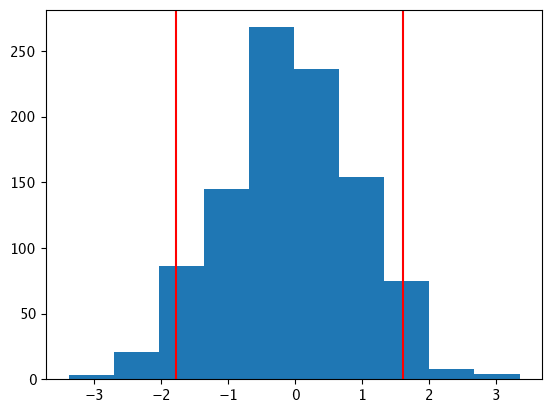

In [55]:
# plot the histogram for the data and draw a vertical red line at 95th percentile
plt.hist(d)
plt.axvline(x = np.percentile(d, q = 95), color = 'r')
plt.axvline(x = np.percentile(d, q = 5), color = 'r')

# About the Assignment


## Task 2 - Question 1
- Correction: What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1
- To Answer the question, Calculate proportions and means and justify your answer with the numbers you have calculated

More on groupby: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
- use groupby to get a groupby object
- You can use groups.keys() to get the group keys
- Use get_group() with one of the keys to get the data for that group
- Use .count() or .size() the same way as you did with .mean()


In [58]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 
          'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three',
          'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})


In [59]:
grouped = df.groupby('A')
grouped.groupby...

In [ ]:
bar_group = grouped.get_group('bar').count()
bar_group